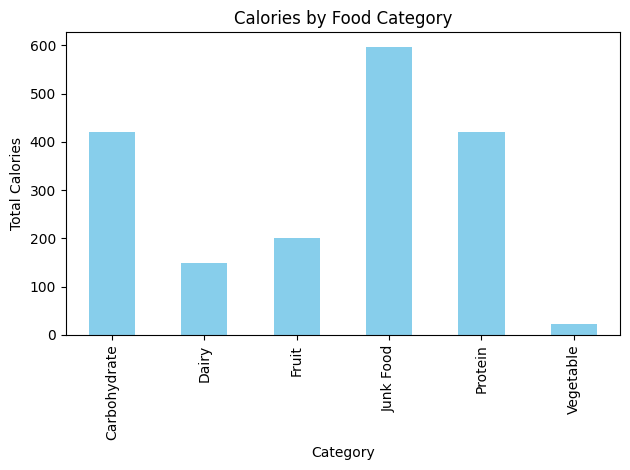

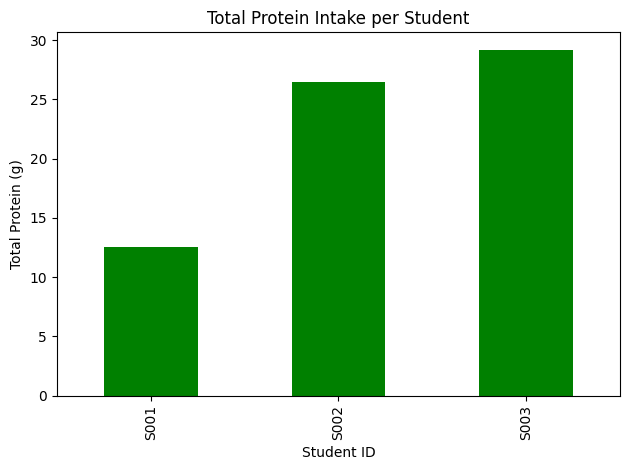

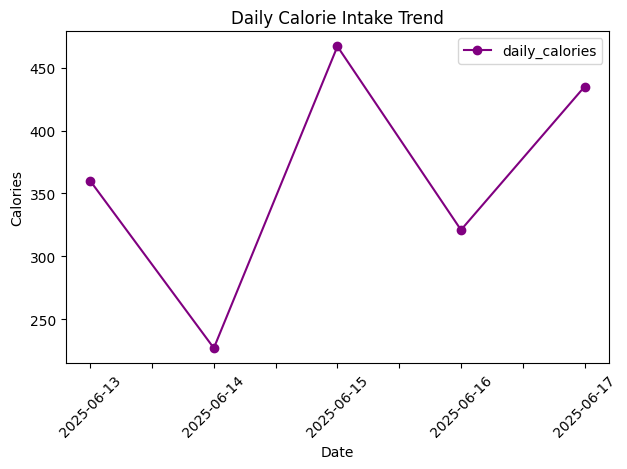

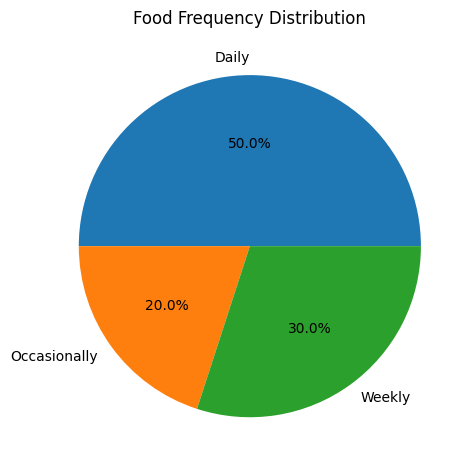

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create database and table
conn = sqlite3.connect("college_food_data.db")
cursor = conn.cursor()

# Drop table if it already exists
cursor.execute("DROP TABLE IF EXISTS food_choices")

# Create the table for food choices
cursor.execute("""
CREATE TABLE food_choices (
    id INTEGER PRIMARY KEY,
    student_id TEXT,
    food_item TEXT,
    category TEXT,
    calories INTEGER,
    protein REAL,
    carbs REAL,
    fat REAL,
    frequency TEXT, -- Daily, Weekly, Occasionally
    intake_date TEXT
)
""")

# Step 2: Insert sample food data
sample_data = [
    ("S001", "Apple", "Fruit", 95, 0.3, 25, 0.2, "Daily", "2025-06-13"),
    ("S002", "Paneer", "Protein", 265, 18.3, 1.2, 20.8, "Weekly", "2025-06-13"),
    ("S003", "White Rice", "Carbohydrate", 204, 4.2, 44, 0.4, "Daily", "2025-06-14"),
    ("S001", "Spinach", "Vegetable", 23, 2.9, 3.6, 0.4, "Weekly", "2025-06-14"),
    ("S002", "Fried Chips", "Junk Food", 312, 3.2, 29, 22, "Occasionally", "2025-06-15"),
    ("S003", "Egg", "Protein", 155, 13, 1.1, 11, "Daily", "2025-06-15"),
    ("S001", "Banana", "Fruit", 105, 1.3, 27, 0.3, "Daily", "2025-06-16"),
    ("S002", "Brown Rice", "Carbohydrate", 216, 5, 45, 1.8, "Weekly", "2025-06-16"),
    ("S003", "Pizza", "Junk Food", 285, 12, 36, 10, "Occasionally", "2025-06-17"),
    ("S001", "Milk", "Dairy", 150, 8, 12, 8, "Daily", "2025-06-17")
]

cursor.executemany("""
INSERT INTO food_choices (student_id, food_item, category, calories, protein, carbs, fat, frequency, intake_date)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
""", sample_data)
conn.commit()

# Step 3: Query data into DataFrames

# 1. Total Calories by Category
df1 = pd.read_sql_query("""
SELECT category, SUM(calories) AS total_calories
FROM food_choices
GROUP BY category
""", conn)

# 2. Protein Intake by Student
df2 = pd.read_sql_query("""
SELECT student_id, SUM(protein) AS total_protein
FROM food_choices
GROUP BY student_id
""", conn)

# 3. Daily Calorie Intake Trend
df3 = pd.read_sql_query("""
SELECT intake_date, SUM(calories) AS daily_calories
FROM food_choices
GROUP BY intake_date
ORDER BY intake_date
""", conn)

# 4. Food Frequency Distribution
df4 = pd.read_sql_query("""
SELECT frequency, COUNT(*) AS count
FROM food_choices
GROUP BY frequency
""", conn)

conn.close()

# Step 4: Visualizations

# 1. Total Calories by Category
df1.plot(kind='bar', x='category', y='total_calories', legend=False, color='skyblue')
plt.title("Calories by Food Category")
plt.xlabel("Category")
plt.ylabel("Total Calories")
plt.tight_layout()
plt.savefig("calories_by_category.png")
plt.show()

# 2. Protein Intake by Student
df2.plot(kind='bar', x='student_id', y='total_protein', legend=False, color='green')
plt.title("Total Protein Intake per Student")
plt.xlabel("Student ID")
plt.ylabel("Total Protein (g)")
plt.tight_layout()
plt.savefig("protein_by_student.png")
plt.show()

# 3. Daily Calorie Intake Trend
df3.plot(kind='line', x='intake_date', y='daily_calories', marker='o', color='purple')
plt.title("Daily Calorie Intake Trend")
plt.xlabel("Date")
plt.ylabel("Calories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("daily_calorie_trend.png")
plt.show()

# 4. Food Frequency Distribution
df4.set_index('frequency').plot(kind='pie', y='count', autopct='%1.1f%%', legend=False)
plt.title("Food Frequency Distribution")
plt.ylabel("")
plt.tight_layout()
plt.savefig("frequency_distribution.png")
plt.show()